<img src="https://drive.google.com/uc?id=1-d7H1l1lJ28_sLcd9Vvh_N-yro7CJZcZ" style="Width:1000px">

# Golden Plains Roadside Biodiversity

This is your first data problem! Remember, "Data Problems" are a little bit less directed than the skills problem. They are here to encourage you to use your critical thinking when dealing with data. It is also a better reflection of the type of problems you will encounter during your assessed coursework at the end of the course. Make sure you understand what you have done in the previous exercises, and apply it here. Also, ***get into the habit of maintaining a  clean, working notebook***. This will be a key assessment criteria for your marked coursework later next week, so take this opportunity (and further ones) to learn how to do this. This includes using `markdown` cells for comments and observations, making sure your code can run from top to bottom when using `run all cells` from the menu, and of course, keeping a **clean code** practice. It also also a good idea, once you are done with your work, to put all of your `import` statements at the top of the notebook: this way, it is clear what is imported in the entire notebook and allows you to focus on your more important code below.

Here is a little bit of information on the data you are given. Golden Plains Shire (Australia) is responsible for managing 1834 kilometres of road reserves. Road reserves are not only used for transport but also act as service corridors, in fire prevention, recreation, and occasionally agricultural pursuits. Native vegetation on roadsides is important flora and fauna habitat and landscape character.

In 2014, Golden Plains Shire acquired funding through the Victorian Adaptation and Sustainability Partnership (VASP) to undertake Councils ‘Building Adaptive Capacity on Roadsides’ project. The Project was designed to identify significant environmental assets on roadsides, improve roadside management practices and reduce Council’s risk of potential breaches against Federal and State environmental legislation. 

The council made this <a href='https://data.gov.au/data/dataset/golden-plains-roadside-biodiversity'>dataset available here</a>.<br>
![plain](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Mount_Conner%2C_August_2003.jpg/375px-Mount_Conner%2C_August_2003.jpg)
<br>

🎯 Today, you will work with a simplified version of this real dataset. The dataset contains a number of biodiversity observations including one on tree size (`RCACTreesS`). This exercise consists of the data preparation and modelling techniques you have learnt: our goal is to predict via linear regression the `RCACTreesS` using the available features and obtain a good score.

⚠️ This is a long exercises, which will require you to think about the data. Don't hesitate to plot things - if you need to use algorithm that use a `random_seed` such as `train_test_split` or others, remember to always use the value `42` so your results can be compared to the proposed solution. If you get stuck, ask a TA!

# Part I: Ensuring Generalization and EDA

In this first part, do the following:
1. 👇 Load the data into this notebook as a pandas dataframe named `df`, and display its first 5 rows.
2. Check for and drop duplicates
3. We will use the `RCACTreesS` as our target variable (`y`) and all other columns as our features (`X`).
4. Split the dataset into 80%/20% train/test splits (use a `random_state=42`) to create your `X_train`, `X_test`, `y_train`, `y_test` (see above regarding the `y`).
5. **Using only the X_train**, spend some time exploring the dataset, for instance looking at the different columns it contains, it's data types, any missing values. Check for correlations between features, and draw some plots. At the end of this EDA stage, you should have a good idea of what the data is. Try to keep this notebook cleanly organised, using `Markdown` cells to put comments for yourself (and your TAs) about your observations.

In [1]:
from nbta.utils import download_data
download_data(id='19qi8xMUaamIAX8KcZproR33c2JQcOAul')

# All imports below:

In [2]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# LOADING THE DATA HERE
df = pd.read_csv('raw_data/biodiversity.csv')
df.head(5)

,ZoneName,LengthM,SiteCode,DateStart,DateFinish,ZoneDescription,Comments,Comments2,RoadType,RCACScore,...,Majorweeds,Locality,LandFormLS,LandForm00,SoilType,EVCCode,EVCNotes,EVCSource,Origin,Recommenda
0,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
1,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,roadside only scores hcv due to listed species...,NaN,17,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
2,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
3,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
4,haddon common road,9,g083b,17/09/2014,17/09/2014,forest,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,20,20,survey,NaN,NaN


Spend a bit of time exploring the dataset, for instance looking at the different columns it contains, it's data types, any missing values. You could use the `describe()` function as a starting point to have an idea of what is going on.

In [4]:
df.shape

(3245, 64)

# Droping Duplicates

Checking for duplicates, and removing them  from the dataset. I overwite the dataframe `df`.

In [5]:
# Find the number of duplicates
df.duplicated().sum()

286

In [6]:
# Drop them in place and check
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Splitting the dataset

Now that the duplicates have been removed, there is no longer a risk of data leakage and we can split the data. I want to do this **BEFORE** I look at any of the statistics so my eye is not influenced by values in the `X_test` that I should not have seen. From then on, I will ignore my `X_test` (and my original `df` that contains the `X_test` data) and focus all my work only on the `X_train`).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='RCACTreesS'),df.RCACTreesS, train_size=.8, random_state=42)

Let's look at the spread of numerical features using `describe`:

In [8]:
X_train.describe()

,LengthM,RoadType,RCACScore,RoadWidthM,WidthVarie,RCACWidth,RCACTreesW,RCACGround,RCACGrassl,RCACLeafLi,...,PowerlineD,OverallFue,GroundFuel,ElevatedFu,BarkHazard,Majorweeds,LandForm00,EVCCode,Origin,Recommenda
count,2367.000000,0.0,2367.000000,2353.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,...,2251.000000,0.0,0.0,0.0,0.0,0.0,0.0,2367.000000,0.0,0.0
mean,3.639206,NaN,14.379806,5.742456,0.169413,1.335868,0.206591,1.940853,0.153359,0.627376,...,307.716126,NaN,NaN,NaN,NaN,NaN,NaN,591.845374,NaN,NaN
std,2.526435,NaN,9.249010,4.259540,0.375195,0.529751,0.571948,0.235949,0.634767,0.862320,...,4.341203,NaN,NaN,NaN,NaN,NaN,NaN,827.530674,NaN,NaN
min,1.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,291.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
25%,1.000000,NaN,7.000000,4.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,NaN,NaN
50%,3.000000,NaN,12.000000,4.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,NaN,NaN
75%,6.000000,NaN,20.000000,6.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,719.000000,NaN,NaN
max,9.000000,NaN,35.000000,80.000000,1.000000,3.000000,3.000000,2.000000,5.000000,2.000000,...,335.000000,NaN,NaN,NaN,NaN,NaN,NaN,2247.000000,NaN,NaN


### Correlation matrix

It is also a good idea to look at the correlations between features - are any highly correlated?

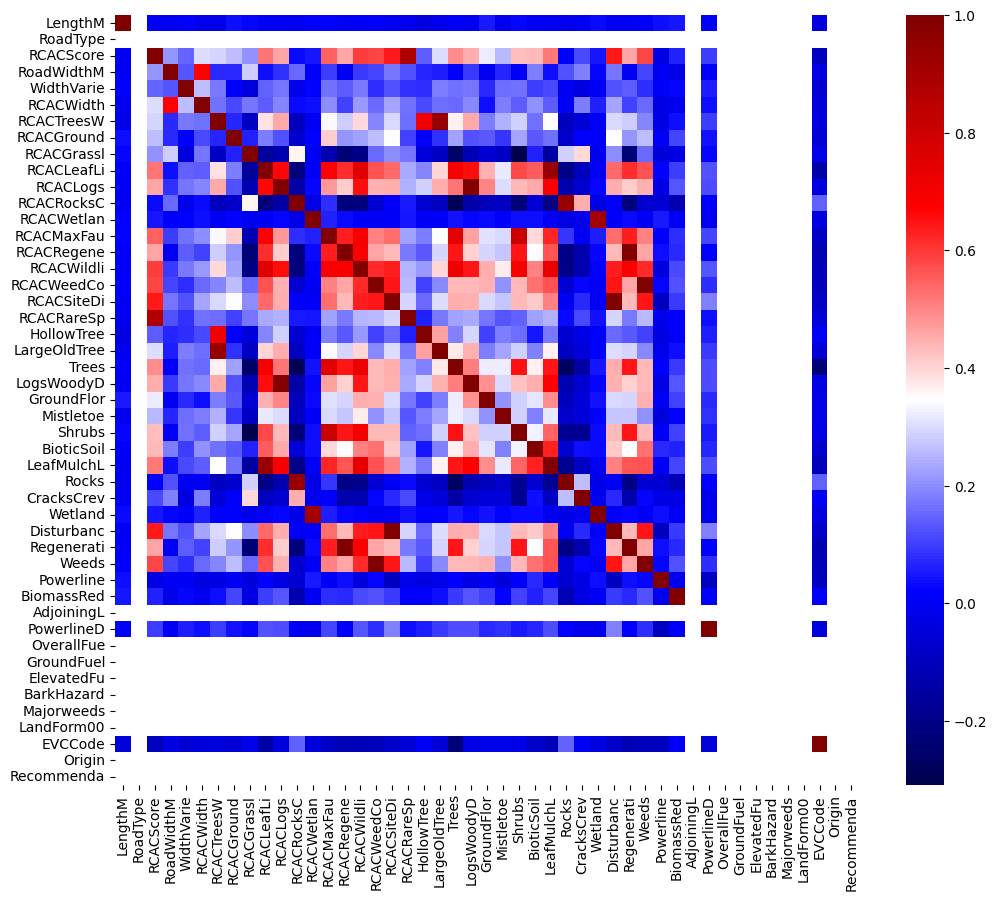

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
corr = X_train.select_dtypes(['Int64', 'Float64']).corr() # Only selecting the numerical values here

sns.heatmap(corr, cmap='seismic', ax=ax);

### We can also look at the data types and explore missing values

In [10]:
# To make my life easier, I create a DataFrame of data types
data_types = pd.DataFrame(X_train.dtypes, columns=['Data Type'])

In [11]:
# This is the different data types in my collections:
data_types.value_counts()

Data Type
int64        34
object       16
float64      13
Name: count, dtype: int64

In [12]:
# Let's see the categorical data
X_train.select_dtypes('object')

,ZoneName,SiteCode,DateStart,DateFinish,ZoneDescription,Comments,Comments2,LRoadWidth,RRoadWidth,AdjoiningV,CanopyCont,Locality,LandFormLS,SoilType,EVCNotes,EVCSource
3190,dawber road,g395,03/09/2015,03/09/2015,pasture grasses and weeds,NaN,NaN,NaN,NaN,sb/e,0,inverleigh,7.1pft5-1,ma,2223,NaN
604,tippetts lane,g223,05/11/2014,05/11/2014,scattered wattles and a mainly pasture grass g...,NaN,NaN,NaN,NaN,e,0,dereel,2.1lsp6-2,szb,175,NaN
1658,"boyles road, werneth",g131,30/04/2015,30/04/2015,grassland,NaN,NaN,NaN,NaN,eh,0,werneth,7.1pbfq5-1,yk,132,NaN
1982,pioneer ridge road,g119,14/08/2015,14/08/2015,forest,NaN,hcv roadside converted to very high status due...,NaN,NaN,i+e,3,meredith,2.1lsp5-6,dd,21,NaN
3234,peregrine way,g550,04/09/2015,04/09/2015,cleared with occasional trees and/or shrubs,NaN,NaN,NaN,NaN,e,0,teesdale,7.1pft5-1,ma,803,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,"morris road, rokewood",g115,28/05/2015,28/05/2015,pasture grasses and weeds,NaN,NaN,NaN,NaN,e,0,rokewood,2.1pfc5-1,de,175,NaN
1194,wilgul-werneth road,g129,11/12/2014,11/12/2014,grassland,NaN,hcv roadside converted to very high status due...,NaN,NaN,e,0,werneth,7.1pbfq5-1,yk,132,NaN
1231,rokewood-shelford road,g213,17/12/2014,17/12/2014,pasture grasses and weeds,NaN,NaN,NaN,NaN,e,0,rokewood,7.2pbq5-1,st,132,NaN
1399,sebastopol-smythesdale road,g044,12/03/2015,12/03/2015,cleared with occasional trees and/or shrubs,NaN,roadside only scores hcv due to listed species...,NaN,NaN,e/sb,0,ross creek,7.1pbfq7-3,yd,47,NaN


In [13]:
# And the numerical data

X_train.select_dtypes(['int64','float64'])

,LengthM,RoadType,RCACScore,RoadWidthM,WidthVarie,RCACWidth,RCACTreesW,RCACGround,RCACGrassl,RCACLeafLi,...,PowerlineD,OverallFue,GroundFuel,ElevatedFu,BarkHazard,Majorweeds,LandForm00,EVCCode,Origin,Recommenda
3190,4,NaN,5,4.0,0,1,0,1,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,2223,NaN,NaN
604,1,NaN,9,4.0,0,1,0,2,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
1658,4,NaN,10,4.0,0,1,0,2,2,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,132,NaN,NaN
1982,1,NaN,32,4.0,0,1,0,2,0,2,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN
3234,5,NaN,6,4.0,0,1,2,2,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,6,NaN,4,4.0,0,1,0,2,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
1194,1,NaN,31,10.0,0,2,0,2,3,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,132,NaN,NaN
1231,1,NaN,7,4.0,0,1,0,2,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,132,NaN,NaN
1399,2,NaN,23,6.0,0,2,0,2,0,0,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN


In [14]:
# There seems to be a lot of empty values. Let's explore this:
pct_empty = X_train.isnull().sum().sort_values(ascending=False)/X_train.shape[0]
pct_empty[pct_empty>.3] # Only displaying the values with lots of empty

Recommenda    1.000000
RoadType      1.000000
AdjoiningL    1.000000
OverallFue    1.000000
GroundFuel    1.000000
ElevatedFu    1.000000
Majorweeds    1.000000
LandForm00    1.000000
BarkHazard    1.000000
Origin        1.000000
RRoadWidth    0.948880
Comments      0.946346
LRoadWidth    0.939163
EVCSource     0.892269
Comments2     0.733418
dtype: float64

In [15]:
pct_empty[pct_empty<.3] # Only displaying the values with less than 30% empty values

SoilType           0.110266
LandFormLS         0.108576
Locality           0.108576
PowerlineD         0.049007
RoadWidthM         0.005915
Trees              0.002112
EVCNotes           0.001690
EVCCode            0.000000
CanopyCont         0.000000
AdjoiningV         0.000000
BioticSoil         0.000000
BiomassRed         0.000000
Powerline          0.000000
Weeds              0.000000
Regenerati         0.000000
Disturbanc         0.000000
Wetland            0.000000
CracksCrev         0.000000
Rocks              0.000000
LeafMulchL         0.000000
ZoneName           0.000000
Shrubs             0.000000
RCACLogs           0.000000
SiteCode           0.000000
DateStart          0.000000
DateFinish         0.000000
ZoneDescription    0.000000
RCACScore          0.000000
WidthVarie         0.000000
RCACWidth          0.000000
RCACTreesW         0.000000
RCACGround         0.000000
RCACGrassl         0.000000
RCACLeafLi         0.000000
RCACRocksC         0.000000
Mistletoe          0

In [16]:
# We can calculate the proportion of features that hvae <30% missing values:
pct_empty[pct_empty<.3].shape[0]/pct_empty.shape[0]

0.7619047619047619

## What we learned

We already know the following now:
1. The data has numerical values and categorical values
2. Some of the numerical values are correlated
3. There are some features with >30% missing values but 76% of the features are well represented (not bad!)

# Part II: Missing values and scaling

Now do the following:
1. Drop features with >30% missing values
2. Imput `RoadWidthM`, `PowerlineD` and `Trees` using the most appropriate strategy <details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ Look at the datatype of <code>PowerlineD</code> and the distribution of the data using the <code>.unique()</code> method. Although <code>PowerlineD</code> is a numeric value, it clearly only has discrete distribution: what would be a logical value to impute? The same applies to <code>Trees</code> and <code>RoadWidthM</code> but for a different reason: they are a continuous variable but there is clearly one value that dominates the distribution: it makes sense to assume that the `nan` represent this most frequent value. So you can impute both of these variables at the same time.
</details> 
3. Imput `Locality` and `EVNotes` <details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Clearly <code>Locality</code> refers to the name of the county or region where the data comes from. We could impute the most frequent locality, but this would induce some errors. In this case, the best strategy is simply to replace the <code>nan</code> by something meaningful such as 'not known'. <code>EVCNotes</code> is somewhat similar: the <code>nan</code> values indicate that no notes exist, so we should replace them by 'no notes'.
</details>
4. Impute `SoilType` and `LandformLS` <details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ These two are tricky. They both are string values, and they both have two classes that are very common. On a real project, a good data scientist will study what those codes means <a href="http://vro.agriculture.vic.gov.au/dpi/vro/vrosite.nsf/pages/landform_land_systems_rees/$FILE/TECH_56%20ch6.pdf"> by refering to the government publication</a>. In an ideal world we would explore different strategies for imputation (we will see this later in the course). However here we need to decide based on little evidence. Because we have no information, and because there is not a clear majority in either soil or landform classes, the best is to impute 'SoilTypeNA' and 'LandFormLSNA' as as a new class.
</details>
5. Imput `CanopyCont` <details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ If you do a <code>value_counts()</code> on <code>CanopyCont</code> you will see that this consists of 4 numerical variables, and 5 categorical variables. It is clear that this column has two different encoding for the same concept: how continuous is the canopy? The easiest is to transform this into a numerical column by doing the following replacements: 'none'=0, 'sparse'=1, 'patchy'=2, 'continous' or 'c' = 3. You probably want to use a python dictionary and an <code>apply()</code> function to do that, and remember to cast your values to an <code>int</code> or a <code>float</code>!
</details>
6. Scale all of your numerical features using an appropriate scaler. Check their distribution before deciding on your scaling strategy! <details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>WidthVarie</code>, & <code>Powerline</code> are clearly binary variable ([0,1]). They should not be scaled, but rater can optionally be encoded using a <code>CategoricalEncoder</code>. Simply leave them as they are. All other numerical features are non-guassian so a `RobustScaler` is probably the most appropriate.
</details>

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median
- Impute a different value which makes sense for the particular data

Make changes effective in the dataset `X_train`. Hints are provided to guide you along in your decision, but before using the hint, try to come up with your own strategy by plotting a historgram of distribution of your variables, or looking a a `value_counts()` output. Trying on your own before looking at the hint is important to your learning.

## `Features with >30% missing data`

Identify all features where the amount of missing data is >30% and deal with it approrpiately.

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ The easiest way to do this is to first create a series containing the percentage of missing values, then filter this for values > 30%, and obtain from it the column names of features (here, the index values) that need to be dropped from the data. Rember that 'isnull().sum()' returns a series of the number of missing value, with the original dataframe column names used as index values.
</details> 

In [17]:
# First, create the list of missing values
missing_values = ((X_train.isnull().sum())/X_train.shape[0]*100)

# Filter for >30% and sort it in descending order
missing_values = missing_values[missing_values>30]
missing_values.sort_values(ascending=False)

RoadType      100.000000
AdjoiningL    100.000000
OverallFue    100.000000
GroundFuel    100.000000
ElevatedFu    100.000000
BarkHazard    100.000000
Majorweeds    100.000000
LandForm00    100.000000
Origin        100.000000
Recommenda    100.000000
RRoadWidth     94.888044
Comments       94.634559
LRoadWidth     93.916350
EVCSource      89.226869
Comments2      73.341783
dtype: float64

In [18]:
# Create an array of names to drop from the dataframe based on missing_values
to_drop = missing_values.index.values
to_drop

array(['Comments', 'Comments2', 'RoadType', 'LRoadWidth', 'RRoadWidth',
       'AdjoiningL', 'OverallFue', 'GroundFuel', 'ElevatedFu',
       'BarkHazard', 'Majorweeds', 'LandForm00', 'EVCSource', 'Origin',
       'Recommenda'], dtype=object)

In [19]:
# Drop and check the new dataframe
X_train = X_train.drop(to_drop, axis=1)
X_train

,ZoneName,LengthM,SiteCode,DateStart,DateFinish,ZoneDescription,RCACScore,RoadWidthM,WidthVarie,RCACWidth,...,Powerline,BiomassRed,AdjoiningV,PowerlineD,CanopyCont,Locality,LandFormLS,SoilType,EVCCode,EVCNotes
3190,dawber road,4,g395,03/09/2015,03/09/2015,pasture grasses and weeds,5,4.0,0,1,...,0,298,sb/e,309.0,0,inverleigh,7.1pft5-1,ma,2223,2223
604,tippetts lane,1,g223,05/11/2014,05/11/2014,scattered wattles and a mainly pasture grass g...,9,4.0,0,1,...,0,223,e,309.0,0,dereel,2.1lsp6-2,szb,175,175
1658,"boyles road, werneth",4,g131,30/04/2015,30/04/2015,grassland,10,4.0,0,1,...,0,300,eh,309.0,0,werneth,7.1pbfq5-1,yk,132,132
1982,pioneer ridge road,1,g119,14/08/2015,14/08/2015,forest,32,4.0,0,1,...,0,300,i+e,309.0,3,meredith,2.1lsp5-6,dd,21,21
3234,peregrine way,5,g550,04/09/2015,04/09/2015,cleared with occasional trees and/or shrubs,6,4.0,0,1,...,0,298,e,309.0,0,teesdale,7.1pft5-1,ma,803,803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,"morris road, rokewood",6,g115,28/05/2015,28/05/2015,pasture grasses and weeds,4,4.0,0,1,...,0,289,e,309.0,0,rokewood,2.1pfc5-1,de,175,175
1194,wilgul-werneth road,1,g129,11/12/2014,11/12/2014,grassland,31,10.0,0,2,...,0,289,e,309.0,0,werneth,7.1pbfq5-1,yk,132,132
1231,rokewood-shelford road,1,g213,17/12/2014,17/12/2014,pasture grasses and weeds,7,4.0,0,1,...,0,289,e,309.0,0,rokewood,7.2pbq5-1,st,132,132
1399,sebastopol-smythesdale road,2,g044,12/03/2015,12/03/2015,cleared with occasional trees and/or shrubs,23,6.0,0,2,...,0,289,e/sb,309.0,0,ross creek,7.1pbfq7-3,yd,47,47


In [20]:
# Check again for missing values > 0: none should be above 30%
missing_values = ((X_train.isnull().sum())/X_train.shape[0]*100)
missing_values = missing_values[missing_values>0]
missing_values.sort_values(ascending=False)

SoilType      11.026616
Locality      10.857626
LandFormLS    10.857626
PowerlineD     4.900718
RoadWidthM     0.591466
Trees          0.211238
EVCNotes       0.168990
dtype: float64

## `RoadWidthM`, `PowerlineD` and `Trees`
🛂 Check for missing values in `RoadWidthM`, `PowerlineD` and `Trees` and deal with them appropriately.

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ Look at the datatype of <code>PowerlineD</code> and the distribution of the data using the <code>.unique()</code> method. Although <code>PowerlineD</code> is a numeric value, it clearly only has discrete distribution: what would be a logical value to impute? The same applies to <code>Trees</code> and <code>RoadWidthM</code> but for a different reason: they are a continuous variable but there is clearly one value that dominates the distribution: it makes sense to assume that the `nan` represent this most frequent value. So you can impute both of these variables at the same time.
</details> 

In [21]:
print(f'# Missing RoadWidthM:{X_train.RoadWidthM.isnull().sum()}')
print(f'# Missing PowerlineD:{X_train.PowerlineD.isnull().sum()}')
print(f'# Missing Trees:{X_train.Trees.isnull().sum()}')

# Missing RoadWidthM:14
# Missing PowerlineD:116
# Missing Trees:5


In [22]:
X_train.PowerlineD.dtype

dtype('float64')

In [23]:
X_train.PowerlineD.unique()

array([309., 307., 310., 306., 291.,  nan, 335.])

In [24]:
X_train.PowerlineD.value_counts()

PowerlineD
309.0    1751
291.0     135
307.0     122
310.0     121
306.0     121
335.0       1
Name: count, dtype: int64

In [25]:
X_train.Trees.value_counts()

Trees
0.0     1109
16.0     432
18.0     303
20.0     266
19.0     243
17.0       8
1.0        1
Name: count, dtype: int64

In [26]:
X_train.RoadWidthM.value_counts()

RoadWidthM
4.0     1526
8.0      357
6.0      197
20.0      79
5.0       71
10.0      69
15.0      19
12.0      13
2.0        7
3.0        7
7.0        4
80.0       3
1.0        1
Name: count, dtype: int64

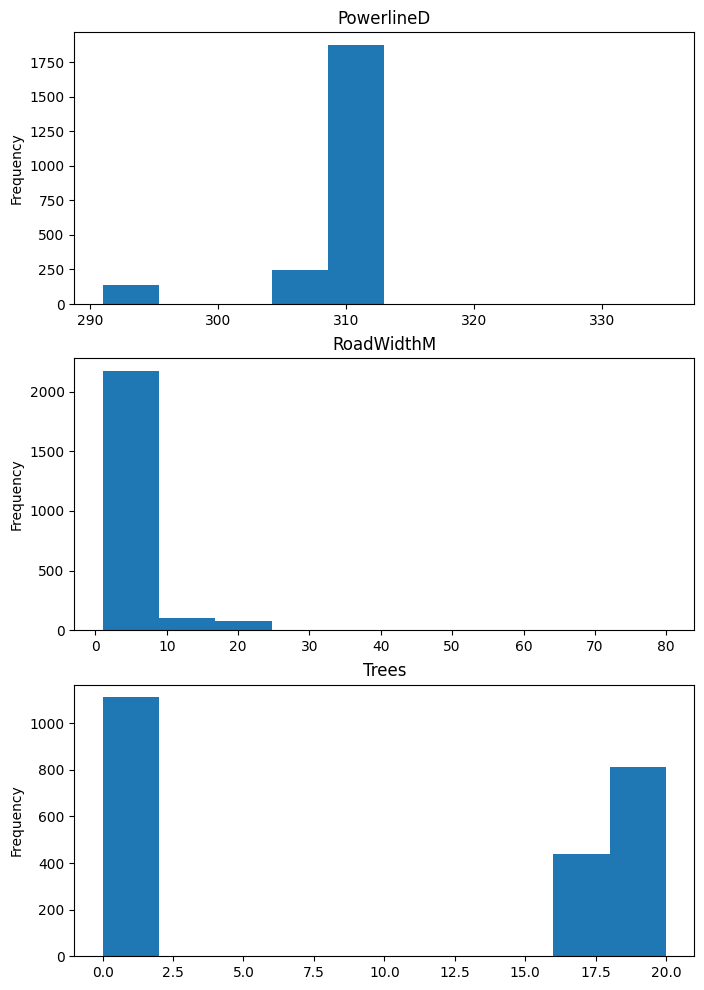

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1,figsize=(8,12))

for ax, feature in zip(axes.flatten(), ['PowerlineD','RoadWidthM', 'Trees']):
    X_train[feature].plot(kind='hist',ax=ax)
    ax.set_title(feature)

In [28]:
from sklearn.impute import SimpleImputer

cw_imputer = SimpleImputer(strategy='most_frequent').fit(X_train[['PowerlineD','Trees','RoadWidthM']])
X_train[['PowerlineD','Trees','RoadWidthM']]= cw_imputer.transform(X_train[['PowerlineD','Trees','RoadWidthM']])

## `Locality` and `EVCNotes`

🛂 Check for missing values in `Locality` and `EVCNotes` for missing values and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Clearly <code>Locality</code> refers to the name of the county or region where the data comes from. We could impute the most frequent locality, but this would induce some errors. In this case, the best strategy is simply to replace the <code>nan</code> by something meaningful such as 'not known'. <code>EVCNotes</code> is somewhat similar: the <code>nan</code> values indicate that no notes exist, so we should replace them by 'no notes'.
</details>

In [29]:
print(f'# Missing Locality:{X_train.Locality.isnull().sum()}')
print(f'# Missing EVCNotes:{X_train.EVCNotes.isnull().sum()}')

# Missing Locality:257
# Missing EVCNotes:4


In [30]:
# Check dtypes and values
X_train.Locality.describe()

count         2110
unique          65
top       meredith
freq           157
Name: Locality, dtype: object

In [31]:
X_train.Locality.value_counts()

Locality
meredith          157
rokewood          108
dereel            107
scarsdale         104
ross creek         89
                 ... 
cargerie            1
bradvale            1
skipton             1
staughton vale      1
bunkers hill        1
Name: count, Length: 65, dtype: int64

In [32]:
X_train.EVCNotes.describe()

count     2363
unique     321
top         47
freq       572
Name: EVCNotes, dtype: object

In [33]:
X_train.EVCNotes.value_counts()

EVCNotes
47                                               572
175                                              345
132                                              300
2223                                             277
22/20                                             86
                                                ... 
20/22>20/127>[198]>47                              1
47>198>47[almost 23]>47>198>[20/22]>47>198>47      1
22/20/47 intermediate                              1
47>[198]>[47]>20                                   1
[175]>641>[175]                                    1
Name: count, Length: 321, dtype: int64

In [34]:
# Replace wiht appropriate labels
X_train.loc[X_train.Locality.isnull(),'Locality'] = 'not known'
X_train.loc[X_train.EVCNotes.isnull(),'EVCNotes'] = 'no notes'

In [35]:
# Check that there are no more null values
X_train.Locality.isnull().sum() + X_train.EVCNotes.isnull().sum()

0

## `SoilType` and `LandFormLS`

🛂 Check for missing values in `SoilType` and `LandFormLS` and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ These two are tricky. They both are string values, and they both have two classes that are very common. On a real project, a good data scientist will study what those codes means <a href="http://vro.agriculture.vic.gov.au/dpi/vro/vrosite.nsf/pages/landform_land_systems_rees/$FILE/TECH_56%20ch6.pdf"> by refering to the government publication</a>. In an ideal world we would explore different strategies for imputation (we will see this later in the course). However here we need to decide based on little evidence. Because we have no information, and because there is not a clear majority in either soil or landform classes, the best is to impute 'SoilTypeNA' and 'LandFormLSNA' as as a new class.
</details>

In [36]:
print(f'# Missing SoilType:{X_train.SoilType.isnull().sum()}')
print(f'# Missing LandFormLS:{X_train.LandFormLS.isnull().sum()}')

# Missing SoilType:261
# Missing LandFormLS:257


In [37]:
# Check the SoilType column
X_train.SoilType.describe()

count     2106
unique      11
top        szb
freq       503
Name: SoilType, dtype: object

In [38]:
X_train.SoilType.value_counts()

SoilType
szb    503
yk     466
ma     216
ye     199
yf     193
dd     133
yt     120
yd     106
de      90
st      57
rg      23
Name: count, dtype: int64

In [39]:
# Now check the LandFormLS column
X_train.LandFormLS.describe()

count          2110
unique           21
top       2.1lsp6-2
freq            472
Name: LandFormLS, dtype: object

In [40]:
X_train.LandFormLS.value_counts()

LandFormLS
2.1lsp6-2     472
7.1pbfq5-1    381
7.1pft5-1     202
7.1pbfq6-5    192
2.1pft6-4     189
7.1pbfq7-3    111
2.1lsp5-6      86
7.1pbfq6-2     84
2.1lsp7-4      70
7.2pbq5-1      56
2.1hsp7-4      51
2.1pfc5-1      50
2.1hsp5-6      43
2.1pfq6-3      40
2.1lgp5-2      22
2.1pfc5-5      20
2.1pfq7-1      14
7.1pfq5-4      11
7.1pbfq5-4      8
7.1pbfq4-1      4
7.1pfq6-4       4
Name: count, dtype: int64

In [41]:
# Can't easily justify replacing by most frequent - instead create new NA values

X_train.loc[X_train.LandFormLS.isnull(),'LandFormLS'] = 'LandFormLSNA'
X_train.loc[X_train.SoilType.isnull(),'SoilType'] = 'SoilTypeNA'

## `CanopyCont`

🛂 Check for missing values in `CanopyCont` and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ If you do a <code>value_counts()</code> on <code>CanopyCont</code> you will see that this consists of 4 numerical variables, and 5 categorical variables. It is clear that this column has two different encoding for the same concept: how continuous is the canopy? The easiest is to transform this into a numerical column by doing the following replacements: 'none'=0, 'sparse'=1, 'patchy'=2, 'continous' or 'c' = 3. You probably want to use a python dictionary and an <code>apply()</code> function to do that, and remember to cast your values to an <code>int</code> or a <code>float</code>!
</details>

In [42]:
print(f'# Missing CanopyCont:{X_train.CanopyCont.isnull().sum()}')

# Missing CanopyCont:0


In [43]:
# Checking the distribution of values in CanopyCont
X_train.CanopyCont.value_counts()

CanopyCont
0             1322
2              293
3              268
1              229
none            94
continuous      72
patchy          69
sparse          19
c                1
Name: count, dtype: int64

In [44]:
# Create a dictionaty to replace strings by int:
dic = {'none':0,
      'sparse':1,
      'patchy':2,
      'continuous':3,
      'c':3}

# Use an apply lambda function to replace the value. Cast to int, and return default value as 'x'
X_train['CanopyCont'] = X_train.CanopyCont.apply(lambda x:int(dic.get(x, x)))

In [45]:
# Check that it all worked well
X_train.CanopyCont.value_counts()

CanopyCont
0    1416
2     362
3     341
1     248
Name: count, dtype: int64

# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `WidthVarie` , & `Powerline`

⚖️ Scale `WidthVarie` and `Powerline` using the most appropriate scaler.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>WidthVarie</code>, & <code>Powerline</code> are clearly binary variable ([0,1]). They should not be scaled, but rater can optionally be encoded using a <code>CategoricalEncoder</code>. Simply leave them as they are.
</details>

In [46]:
X_train.Powerline.value_counts()

Powerline
0    2295
1      72
Name: count, dtype: int64

In [47]:
X_train.WidthVarie.value_counts()

WidthVarie
0    1966
1     401
Name: count, dtype: int64

## All other numerical variables

⚖️ How would you scale all of the other variables? Save a list of the numerical column names (minus `WidthVarie` and `Powerline`, see above) in a variable called `numerical_columns`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ All other variables are continous, but their distribution is non-gaussian. We can use a RobustScaler() here. The first task is to identify the columns with a dtype of either 'float64' or 'int64': you can do this programmatically to avoid having to type a long list of features!
</details>

In [ ]:
import matplotlib.pyplot as plt

# Check for float and int variables
floatv = X_train.dtypes[X_train.dtypes=='float64'].index.values
intv = X_train.dtypes[X_train.dtypes=='int64'].index.values

# vstack the two data types into one numpy array
numerical_columns = np.hstack([floatv,intv])

#Transform numerical_colums to a list to more easily remove the two features
numerical_columns = numerical_columns.tolist()
numerical_columns.remove('Powerline')
numerical_columns.remove('WidthVarie')

In [ ]:
# Create a few plot to check the distribution of the data
fig, axes = plt.subplots(len(numerical_columns),figsize=(8, 120))

for ax, feature in zip(axes, numerical_columns):
    X_train[feature].plot(kind='hist', ax=ax)
    ax.set_title(feature)

In [ ]:
from sklearn.preprocessing import  RobustScaler

X_train[numerical_columns] = RobustScaler().fit_transform(X_train[numerical_columns])

In [ ]:
X_train

In [ ]:
X_train

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = X_train)
result.write()
print(result.check())

### Testing your scaling
Test your code below for scaling before proceeding to ensure all worked well.

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = X_train,
                         features = numerical_columns
)

result.write()
print(result.check())

# Part III: Encoding and Modelling

All that is left to do now is deal with categorical data, and then use this to build a simple model.

# Encoding

👇 Investigate the non-numerical features that require encoding, and apply 'One hot encoding'. To ensure that we do not end up with an explosion of feature, we will retain only categorical features with <15 unique values for encoding. 

So your task is the following:

1. Identify programmatically all of the categorical features that have <15 unique categories and require 'One Hot encoding'
2. In the dataframe, replace the original features by their encoded version(s). Make sure to drop the original features, as well as the features with >15 unique categories from `X_train`

In [ ]:
# First, let's obtain the ohe_features of dtype 'object'
ohe_features = X_train.dtypes[X_train.dtypes==object].index.values

In [ ]:
ohe_features

In [ ]:
# Now we can loop through each feature to ensure their nunique
small_ohe = []

for feature in ohe_features:
    if (X_train[feature].nunique()<15):
        small_ohe.append(feature)
small_ohe

In [ ]:
# Now that we have the small_ohe columns (only 2) we can encode them:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder().fit(X_train[small_ohe])

# horizontal stack of the two arrays
columns = np.hstack(ohe.categories_)

# Create an array of one hot encoded values
ohe_df = pd.DataFrame(ohe.transform(X_train[small_ohe]).toarray(), columns=columns)

# Reset indexes so both dfs have the same (important: drop=True to avoid keeping index as a column)
X_train.reset_index(inplace=True, drop=True)
ohe_df.reset_index(inplace=True, drop=True)

# Join the one hot encoded values to the original dataframe
X_train = X_train.join(ohe_df)

# Drop ALL original categorical variables from the dataframe and check it visually
X_train.drop(ohe_features, axis=1, inplace=True)
X_train


In [ ]:
# Make sure we have the new category in the columns
X_train.columns.values

In [ ]:
X_train.shape

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = X_train)
result.write()
print(result.check())

# Base Modelling

All we need now is to cross validate  a Linear regression model with our `X_train` and `y_train` using `cv=5`. Save its score under variable name `base_model_score`. However, if you do this you will see that we obtain a very low `r2`. This is because not all of the features we have selected are useful - we will talk more about this in a couple of days. So instead, train your model using only the top features that have a correlation with your `y_train` > 0.05.  <details><summary>💡 Hint </summary>
    <br>
    ℹ️ If you are unsure how to do this, check the documentation for the `corr()` function in pandas. Also, you will need to add group the `y_train` and the `X_train` in the same pandas object to do that.
</details>

In [ ]:
corr = X_train.copy()
corr['target']=y_train.copy()

corr = corr.corr().abs().target.sort_values(ascending=False)

corr

In [ ]:
features = corr[corr>.05][1:].index.values
features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

cross_val = cross_validate(estimator=LinearRegression(),X=X_train[features], y=y_train, cv=5, scoring='r2',)

base_model_score = cross_val['test_score'].mean()
base_model_score

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

# 🏁